In [ ]:
# Import all libraries

import sqlite3 as sql
import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

In [ ]:
# Start the database connection

connection = sql.connect('state_results.db')
c = connection.cursor()

In [ ]:
# Create table for car statistics  if it doesn't exist
c.execute('''
    CREATE TABLE IF NOT EXISTS cars (
        car_name VARCHAR(50) PRIMARY KEY,  -- Adding PRIMARY KEY to avoid duplicates
        car_hp INT,
        car_weight INT,
        car_torque INT,
        Zero_To_100 DECIMAL(5, 2)
    )
''')

In [ ]:
# The array where all car objects are added

car_data = [
    ('Benz AMG C63', 503, 4654, 516, 3.6),
    ('Accord Sport 2.0', 252, 3380, 273, 5.5),
    ('BMW M4 CS', 543, 3880, 479, 3.4),
    ('Nissan 400Z', 400, 3485, 350, 4.0),
    ('Tesla Model X Plaid', 1020, 5390, 1050, 2.5),
    ('BMW i4 M50', 544, 5039, 585, 3.9),
    ('Audi RS7', 621, 4575, 637, 3.4),
    ('Mustang EcoBoost', 315, 3588, 350, 5.0),
    ('Dodge Challenger R/T', 375, 4041, 410, 5.1),
    ('Toyota Supra 2.0', 255, 3181, 295, 5.0),
    ('Toyota GR Supra', 382, 3389, 368, 3.9),
    ('Audi RS3', 401, 3593, 369, 3.6),
    ('Honda Civic R', 315, 3188, 310, 5.1),
    ('BMW M2 comp', 404, 3602, 405, 4.0),
    ('Cadillac CTS5-V', 668, 4123, 659, 3.4),
    ('Benz AMG A45S', 421, 3439, 361, 3.9)
]

In [ ]:
# Uses a loop to add every single car as well as its attributes to the SQL table

for car in car_data:
    c.execute('''
        INSERT OR REPLACE INTO cars (car_name, car_hp, car_weight, car_torque, Zero_To_100)
        VALUES (?, ?, ?, ?, ?)
    ''', car)

# Commit the changes to the database
connection.commit()

In [ ]:
# Forms a pandas dataframe from the SQL table

query1 = "SELECT * FROM cars"
df = pd.read_sql_query(query1, connection)
df

,car_name,car_hp,car_weight,car_torque,Zero_To_100
0,Benz AMG C63,503,4654,516,3.6
1,Accord Sport 2.0,252,3380,273,5.5
2,BMW M4 CS,543,3880,479,3.4
3,Nissan 400Z,400,3485,350,4.0
4,Tesla Model X Plaid,1020,5390,1050,2.5
5,BMW i4 M50,544,5039,585,3.9
6,Audi RS7,621,4575,637,3.4
7,Mustang EcoBoost,315,3588,350,5.0
8,Dodge Challenger R/T,375,4041,410,5.1
9,Toyota Supra 2.0,255,3181,295,5.0


In [ ]:
# Exports the dataframe to an excel file

df.to_excel('cars.xlsx', index=False)

In [ ]:
# From the multiple regression linear algebra done in the spreadsheet in the official document, lists out the coefficients
# Also lists out changeable variables of a car if calculations are to be done in here

Y_int = 6.662389896
HP = -0.01392047329
Weight = -0.0003341350878
Torque = 0.01113264893

car_name = 'AUDI RSG Avant'
car_hp = 621
car_weight = 4983
car_torque = 627

car_accel = (car_hp * HP) + (car_weight * Weight) + (car_torque * Torque) + Y_int
car_accel

3.3329517195125993

In [ ]:
# Forms rows and columns of the dataframe to plot

weight = df['car_weight']
hp = df['car_hp']
accel = df['Zero_To_100']

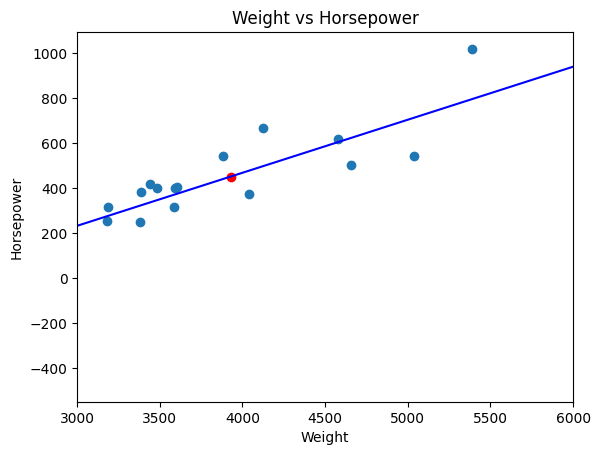

In [ ]:
# Plots the weight and horsepower of a car as well as the linear regression equation used to represent the relation between weight and horsepower
#$ The linear regression equation was formulated in a spreadsheet accessible by the official document

plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Weight vs Horsepower')
plt.plot(weight, hp, 'o')
plt.plot(3928, 452, 'o', color='red')

def line_equation(x):
    return 0.2360 * x - 475

x = np.linspace(0, 6000, 1000)
plt.xlim(3000, 6000)
y = line_equation(x)

plt.plot(x, y, label="line of best fit", color="blue")

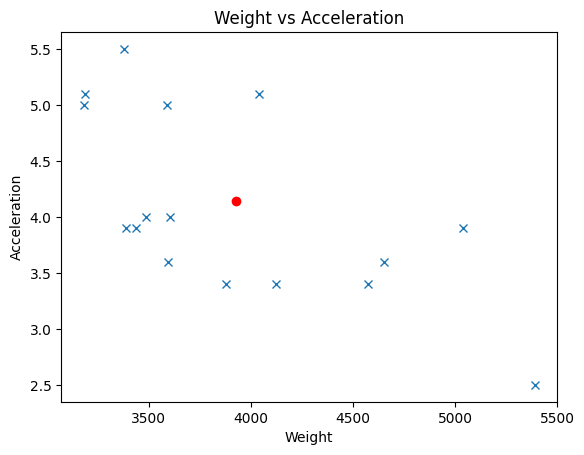

In [ ]:
# The weight and the zero to hundred time are plotted

plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Weight vs Acceleration')
plt.plot(weight, accel, 'x')
plt.plot(3928, 4.14, 'o', color='red')